<a href="https://colab.research.google.com/github/rivit18-design/Test/blob/main/Vertical_slice_updated.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from collections import Counter

# -----------------------------
# Step 1: Load CSV✅
# -----------------------------
filename = "SyntheticData2.csv"
df = pd.read_csv(filename)

# First column is the X-axis
x = df.iloc[:, 0].values

# All other columns are curves (each column = one curve)
curves = df.iloc[:, 1:].values.T   # each row = one curve (n_curves, n_points)✅

# -----------------------------
# Step 2: Characterize curves
# -----------------------------
# Measure change as (last - first) value for each curve
changes = curves[:, -1] - curves[:, 0]

# Rule-based labels (per-curve, before clustering)
labels_rule = []
for change in changes:
    if change <= -0.15:
        labels_rule.append("positive change")
    elif change >= 0.15:
        labels_rule.append("negative change")
    else:
        labels_rule.append("little change")

rule_counts = Counter(labels_rule)   #Provides counts✅
print("Rule-based counts (from raw changes):")
for category, count in rule_counts.items():
    print(f"  {category}: {count}")

Rule-based counts (from raw changes):
  positive change: 8
  little change: 8
  negative change: 3


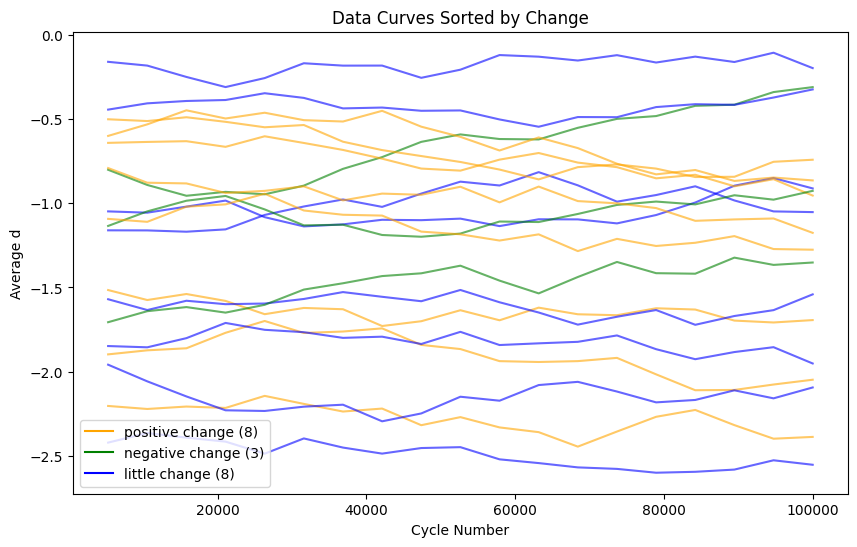

In [61]:
import matplotlib.pyplot as plt
from collections import Counter

# -----------------------------
# Step 3: Plot curves by rule-based labels
# -----------------------------
plt.figure(figsize=(10, 6))

# Define colors for each label✅
colors = {
    "positive change": "orange",
    "negative change": "green",
    "little change": "blue"
}

# Plot each curve in the color corresponding to its label
for curve, label in zip(curves, labels_rule):
    plt.plot(x, curve, color=colors[label], alpha=0.6)

# Add legend with counts
for category, color in colors.items():
    count = rule_counts.get(category, 0)
    plt.plot([], [], color=color, label=f"{category} ({count})")

plt.xlabel("Cycle Number")
plt.ylabel("Average d")
plt.title("Data Curves Sorted by Change")
plt.legend()
plt.show()
#Plot appears succesfully✅